## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [126]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [128]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [24]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [26]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [130]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [38]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 1.2820 - accuracy: 0.6973 - val_loss: 0.8108 - val_accuracy: 0.8318
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.7153 - accuracy: 0.8399 - val_loss: 0.6077 - val_accuracy: 0.8622
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5869 - accuracy: 0.8600 - val_loss: 0.5259 - val_accuracy: 0.8740
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5253 - accuracy: 0.8691 - val_loss: 0.4805 - val_accuracy: 0.8810
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.4877 - accuracy: 0.8758 - val_loss: 0.4511 - val_accuracy: 0.8857
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.4619 - accuracy: 0.8804 - val_loss: 0.4292 - val_accuracy: 0.8888
Epoch 7/20
60000/60000 [==============================] - 1s 18us/st

Test score: 0.33579891421794894
Test accuracy: 0.9100000262260437


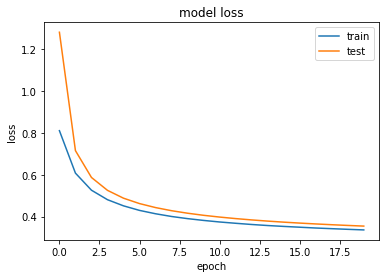

In [58]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)

plt.plot(vy)
plt.plot(ty)
plt.title('model loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [59]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 2.2682 - accuracy: 0.2163 - val_loss: 2.2241 - val_accuracy: 0.4215
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 2.1807 - accuracy: 0.4447 - val_loss: 2.1294 - val_accuracy: 0.5849
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 2.0687 - accuracy: 0.5701 - val_loss: 1.9926 - val_accuracy: 0.5825
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 1.9086 - accuracy: 0.6290 - val_loss: 1.8025 - val_accuracy: 0.6540
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 1.6962 - accuracy: 0.6679 - val_loss: 1.5684 - val_accuracy: 0.6930
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 1.4617 - accuracy: 0.7090 - val_loss: 1.3366 - val_accuracy: 0.7431
Epoch 7/20
60000/60000 [==============================] - 4s 61us/st

Test score: 0.45796136536598203
Test accuracy: 0.8799999952316284


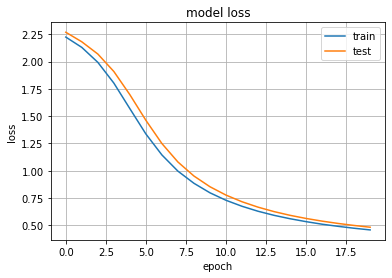

In [62]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(vy)
plt.plot(ty)
plt.title('model loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.show()

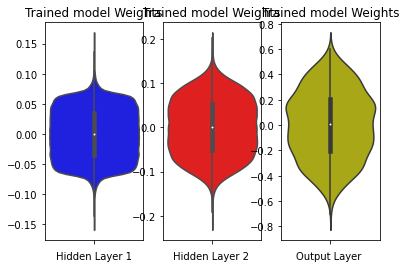

In [63]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

2 Layer

In [64]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(400, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(150, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_14 (Dense)             (None, 150)               60150     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1510      
Total params: 375,660
Trainable params: 375,660
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 2.2676 - accuracy: 0.2213 - val_loss: 2.2253 - val_accuracy: 0.4040
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.1836 - accuracy: 0.4488 - val_loss: 2.1304 - val_accuracy: 0.4691
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.0736 - accuracy: 0.5670 - val_loss: 1.9969 - val_accuracy: 0.6288
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 1.9156 - accuracy: 0.6245 - val_loss: 1.8060 - val_accuracy: 0.6473
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 1.7032 - accuracy: 0.6619 - val_loss: 1.5699 - val_accuracy: 0.6783
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.4649 - accuracy: 0.6984 - val_loss: 1.3341 - val_accuracy: 0.7002
Epoch 7/20
60000/60000 [==============================] - 3s 56us/st

Test score: 0.4634163727045059
Test accuracy: 0.8779000043869019


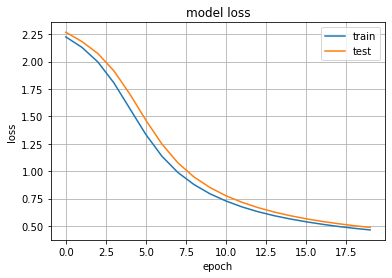

In [66]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(vy)
plt.plot(ty)
plt.title('model loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.show()

3 Layer

In [68]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(240, activation='sigmoid'))
model_sigmoid.add(Dense(100, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 240)               123120    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               24100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 550,150
Trainable params: 550,150
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 2.3109 - accuracy: 0.1166 - val_loss: 2.2945 - val_accuracy: 0.1135
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 2.2918 - accuracy: 0.1245 - val_loss: 2.2879 - val_accuracy: 0.1137
Epoch 3/20
60000/60000 [==============================] - 4s 75us/step - loss: 2.2853 - accuracy: 0.1332 - val_loss: 2.2805 - val_accuracy: 0.1135
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 2.2776 - accuracy: 0.1434 - val_loss: 2.2724 - val_accuracy: 0.1141
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 2.2689 - accuracy: 0.1738 - val_loss: 2.2620 - val_accuracy: 0.1437
Epoch 6/20
60000/60000 [==============================] - 5s 75us/step - loss: 2.2577 - accuracy: 0.2232 - val_loss: 2.2499 - val_accuracy: 0.1981
Epoch 7/20
60000/60000 [==============================] - 5s 76us/st

Test score: 1.0288551973342897
Test accuracy: 0.6908000111579895


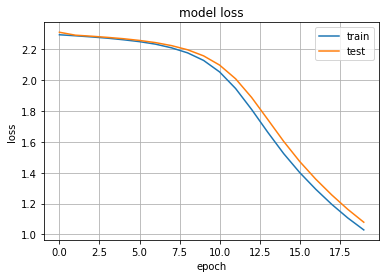

In [70]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(vy)
plt.plot(ty)
plt.title('model loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.show()

  5 Layer

In [71]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(540, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(320, activation='sigmoid'))
model_sigmoid.add(Dense(200, activation='sigmoid'))
model_sigmoid.add(Dense(120, activation='sigmoid'))
model_sigmoid.add(Dense(60, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 540)               423900    
_________________________________________________________________
dense_24 (Dense)             (None, 320)               173120    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               64200     
_________________________________________________________________
dense_26 (Dense)             (None, 120)               24120     
_________________________________________________________________
dense_27 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                610       
Total params: 693,210
Trainable params: 693,210
Non-trainable params: 0
_______________________________________________

In [72]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 2.3065 - accuracy: 0.1095 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 2.3015 - accuracy: 0.1125 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.3014 - accuracy: 0.1127 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/20
60000/60000 [==============================] - 6s 1

Test score: 2.3005089023590086
Test accuracy: 0.11349999904632568


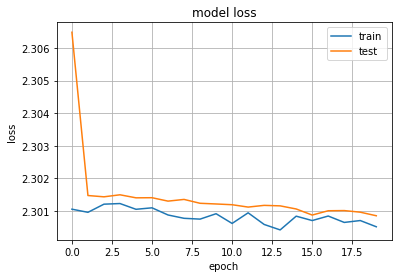

In [73]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt.plot(vy)
plt.plot(ty)
plt.title('model loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [74]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5401 - accuracy: 0.8586 - val_loss: 0.2566 - val_accuracy: 0.9243
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2210 - accuracy: 0.9355 - val_loss: 0.1810 - val_accuracy: 0.9445
Epoch 3/20
60000/60000 [=========

Test score: 0.07186335114348621
Test accuracy: 0.9811999797821045


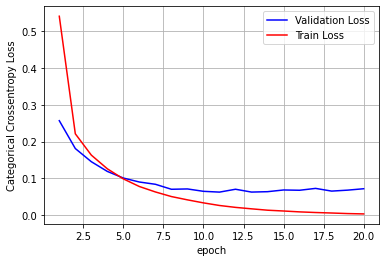

In [75]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

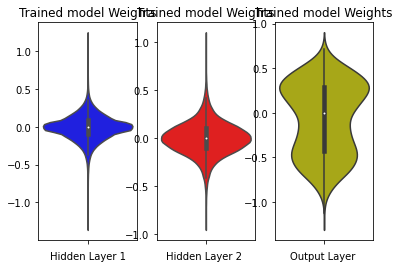

In [76]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

2 Layer

In [77]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(360, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(150, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 360)               282600    
_________________________________________________________________
dense_33 (Dense)             (None, 150)               54150     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1510      
Total params: 338,260
Trainable params: 338,260
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.5680 - accuracy: 0.8521 - val_loss: 0.2558 - val_accuracy: 0.9242
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2238 - accuracy: 0.9343 - val_loss: 0.1896 - val_accuracy: 0.9430
Epoch 3/20
60000/60000 [=========

Test score: 0.07238916951557112
Test accuracy: 0.980400025844574


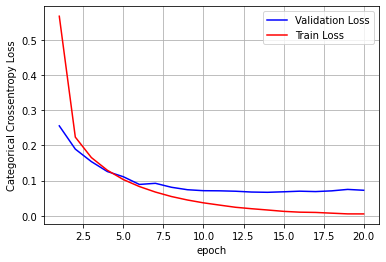

In [78]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Layer

In [79]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(300, activation='sigmoid'))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_36 (Dense)             (None, 300)               153900    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 595,638
Trainable params: 595,638
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.6056 - accuracy: 0.8245 - val_loss: 0.2584 - val_accuracy: 0.9239
Epoch 2/20
60000/60000 [=======================

Test score: 0.09384749033101107
Test accuracy: 0.9785000085830688


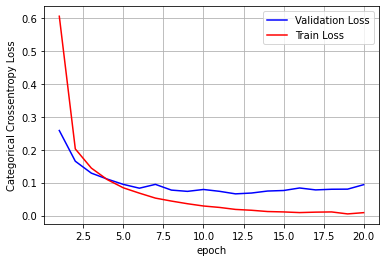

In [80]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Layer

In [81]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(360, activation='sigmoid'))
model_sigmoid.add(Dense(235, activation='sigmoid'))
model_sigmoid.add(Dense(101, activation='sigmoid'))
model_sigmoid.add(Dense(45, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_40 (Dense)             (None, 360)               184680    
_________________________________________________________________
dense_41 (Dense)             (None, 235)               84835     
_________________________________________________________________
dense_42 (Dense)             (None, 101)               23836     
_________________________________________________________________
dense_43 (Dense)             (None, 45)                4590      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                460       
Total params: 700,321
Trainable params: 700,321
Non-trainable params: 0
_______________________________________________

Test score: 0.10777835860727356
Test accuracy: 0.9768000245094299


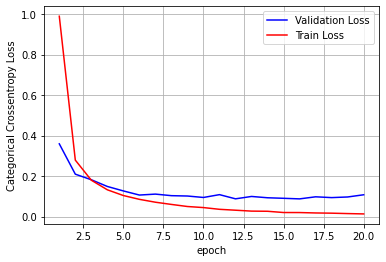

In [82]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU +SGD </h2>

In [83]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.7408 - accuracy: 0.7906 - val_loss: 0.3818 - val_accuracy: 0.8932
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3540 - accuracy: 0.8991 - val_loss: 0.2994 - val_accuracy: 0.9152
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2918 - accuracy: 0.9161 - val_loss: 0.2611 - val_accuracy: 0.9260
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2577 - accuracy: 0.9263 - val_loss: 0.2362 - val_accuracy: 0.9320
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2341 - accuracy: 0.9327 - val_loss: 0.2194 - val_accuracy: 0.9352
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2161 - accuracy: 0.9377 - val_loss: 0.2084 - val_accuracy: 0.9392
Epoch 7/20
60000/60000 [==============================] - 4s 61us/st

Test score: 0.12439951572231948
Test accuracy: 0.9625999927520752


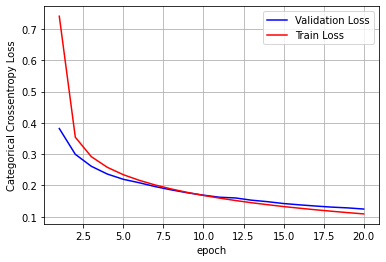

In [85]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

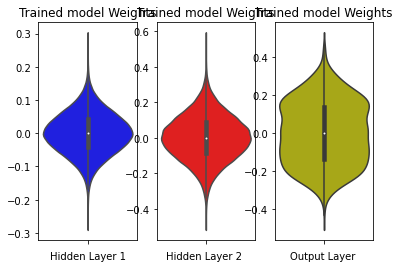

In [86]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

2 Layer

In [87]:
model_relu = Sequential()
model_relu.add(Dense(490, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 490)               384650    
_________________________________________________________________
dense_49 (Dense)             (None, 200)               98200     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                2010      
Total params: 484,860
Trainable params: 484,860
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.7358 - accuracy: 0.7940 - val_loss: 0.3830 - val_accuracy: 0.8968
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3470 - accuracy: 0.9018 - val_loss: 0.2947 - val_accuracy: 0.9191
Epoch 3/20
60000/60000 [=========

Test score: 0.11942493871934712
Test accuracy: 0.9642000198364258


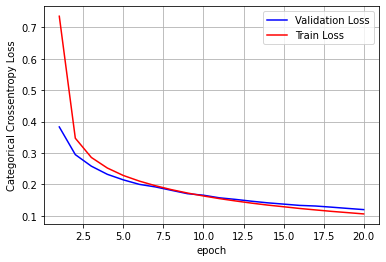

In [88]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Layer

In [89]:
model_relu = Sequential()
model_relu.add(Dense(440, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 440)               345400    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               56448     
_________________________________________________________________
dense_53 (Dense)             (None, 60)                7740      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                610       
Total params: 410,198
Trainable params: 410,198
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.8320 - accuracy: 0.7569 - val_loss: 0.3882 - val_accuracy: 0.8890
Epoch 2/20
60000/60000 [========================

Test score: 0.11402928958134725
Test accuracy: 0.9663000106811523


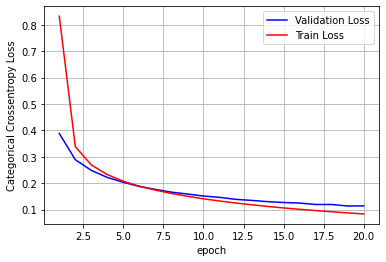

In [90]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Layer

In [91]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(212, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(120, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(66, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 420)               215460    
_________________________________________________________________
dense_57 (Dense)             (None, 212)               89252     
_________________________________________________________________
dense_58 (Dense)             (None, 120)               25560     
_________________________________________________________________
dense_59 (Dense)             (None, 66)                7986      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                670       
Total params: 740,848
Trainable params: 740,848
Non-trainable params: 0
_______________________________________________

Test score: 0.10493868168258923
Test accuracy: 0.9700000286102295


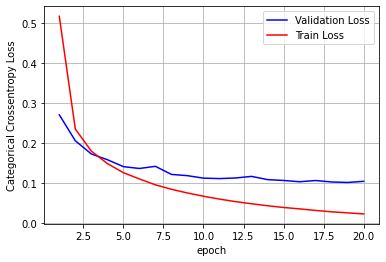

In [92]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + ADAM </h2>

In [93]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_62 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2240 - accuracy: 0.9319 - val_loss: 0.1101 - val_accuracy: 0.9659
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0867 - accuracy: 0.9737 - val_loss: 0.0807 - val_accuracy: 0.9752
Epoch 3/20
60000/60000 [====

Test score: 0.09895115456724864
Test accuracy: 0.980400025844574


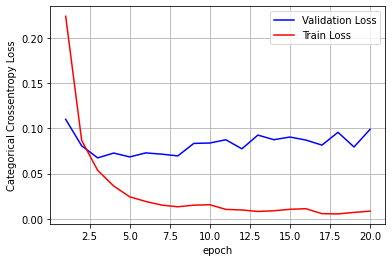

In [94]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

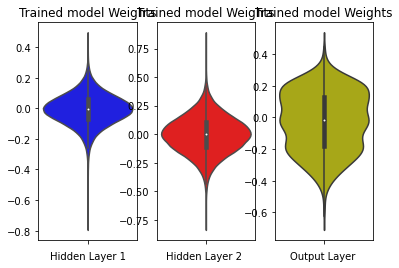

In [95]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

3 Layer

In [96]:
model_relu = Sequential()
model_relu.add(Dense(489, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(322, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 489)               383865    
_________________________________________________________________
dense_65 (Dense)             (None, 322)               157780    
_________________________________________________________________
dense_66 (Dense)             (None, 100)               32300     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                1010      
Total params: 574,955
Trainable params: 574,955
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2264 - accuracy: 0.9315 - val_loss: 0.1201 - val_accuracy: 0.9645
Epoch 2/20
60000/60000 [==================

Test score: 0.12376824894999154
Test accuracy: 0.9778000116348267


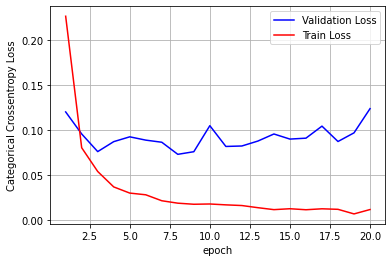

In [97]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Layer

In [98]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(441, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_69 (Dense)             (None, 441)               226233    
_________________________________________________________________
dense_70 (Dense)             (None, 300)               132600    
_________________________________________________________________
dense_71 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_72 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                510       
Total params: 806,241
Trainable params: 806,241
Non-trainable params: 0
_______________________________________________

Test score: 0.12936685208511625
Test accuracy: 0.9757999777793884


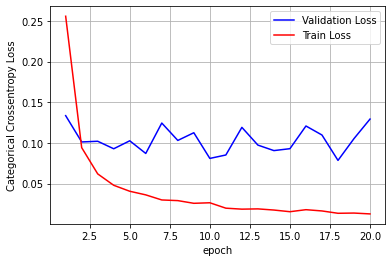

In [99]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [100]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_75 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_76 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [101]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3045 - accuracy: 0.9112 - val_loss: 0.2000 - val_accuracy: 0.9417
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1779 - accuracy: 0.9475 - val_loss: 0.1807 - val_accuracy: 0.9462
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1398 - accuracy: 0.9583 - val_loss: 0.1471 - val_accuracy: 0.9589
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1145 - accuracy: 0.9658 - val_loss: 0.1315 - val_accuracy: 0.9628
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0950 - accuracy: 0.9713 - val_loss: 0.1319 - val_accuracy: 0.9605
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.1185 - val_accuracy: 0.9639
Epoch 7/20
60000/60000 [==============================] - 6s 94us/s

Test score: 0.10156400724619744
Test accuracy: 0.9742000102996826


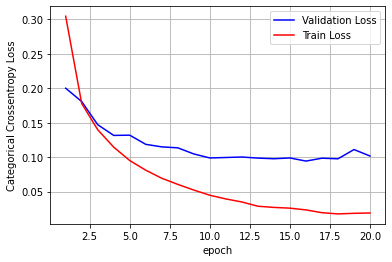

In [102]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

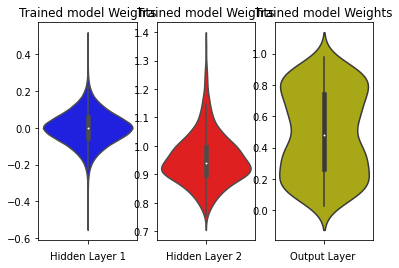

In [103]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

2 Layer

In [104]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(450, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(220, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 450)               353250    
_________________________________________________________________
batch_normalization_3 (Batch (None, 450)               1800      
_________________________________________________________________
dense_78 (Dense)             (None, 220)               99220     
_________________________________________________________________
batch_normalization_4 (Batch (None, 220)               880       
_________________________________________________________________
dense_79 (Dense)             (None, 10)                2210      
Total params: 457,360
Trainable params: 456,020
Non-trainable params: 1,340
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6

Test score: 0.09957436609359284
Test accuracy: 0.9750999808311462


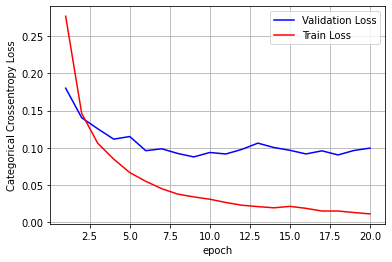

In [105]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Layer

In [106]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(335, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_81 (Dense)             (None, 335)               171855    
_________________________________________________________________
batch_normalization_6 (Batch (None, 335)               1340      
_________________________________________________________________
dense_82 (Dense)             (None, 128)               43008     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_83 (Dense)             (None, 10)              

Test score: 0.10864156060427195
Test accuracy: 0.9699000120162964


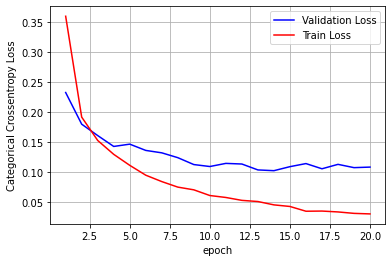

In [107]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Layer

In [108]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(520, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(450, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(210, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(45, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 520)               408200    
_________________________________________________________________
batch_normalization_8 (Batch (None, 520)               2080      
_________________________________________________________________
dense_85 (Dense)             (None, 450)               234450    
_________________________________________________________________
batch_normalization_9 (Batch (None, 450)               1800      
_________________________________________________________________
dense_86 (Dense)             (None, 210)               94710     
_________________________________________________________________
batch_normalization_10 (Batc (None, 210)               840       
_________________________________________________________________
dense_87 (Dense)             (None, 128)             

Test score: 0.14337601760551333
Test accuracy: 0.9575999975204468


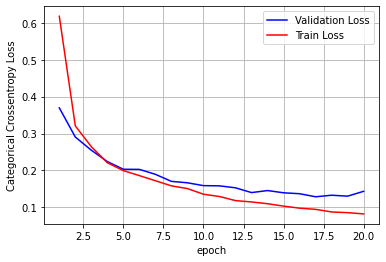

In [109]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [110]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)              

In [111]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.6752 - accuracy: 0.7923 - val_loss: 0.2843 - val_accuracy: 0.9135
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.4312 - accuracy: 0.8676 - val_loss: 0.2554 - val_accuracy: 0.9224
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3845 - accuracy: 0.8824 - val_loss: 0.2363 - val_accuracy: 0.9296
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3575 - accuracy: 0.8919 - val_loss: 0.2233 - val_accuracy: 0.9340
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3351 - accuracy: 0.8977 - val_loss: 0.2170 - val_accuracy: 0.9342
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.3218 - accuracy: 0.9029 - val_loss: 0.2009 - val_accuracy: 0.9407
Epoch 7/20
60000/60000 [==============================] - 6s 1

Test score: 0.10457731561046094
Test accuracy: 0.9695000052452087


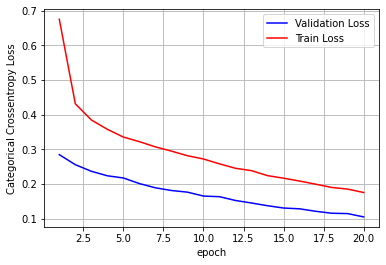

In [112]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

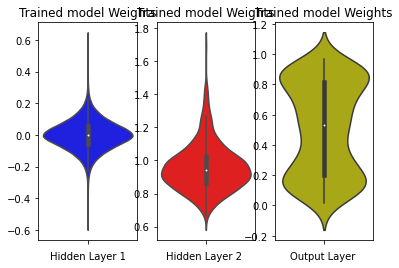

In [113]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

2 Layer

In [114]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(480, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(243, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 480)               376800    
_________________________________________________________________
batch_normalization_15 (Batc (None, 480)               1920      
_________________________________________________________________
dropout_3 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 243)               116883    
_________________________________________________________________
batch_normalization_16 (Batc (None, 243)               972       
_________________________________________________________________
dropout_4 (Dropout)          (None, 243)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 10)              

Test score: 0.0995354565509595
Test accuracy: 0.9718999862670898


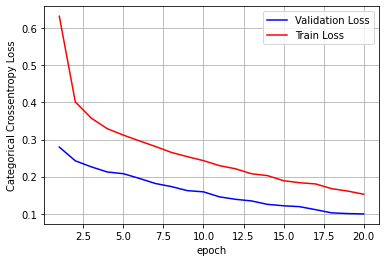

In [115]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

3 Layer

In [116]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(366, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 366)               187758    
_________________________________________________________________
batch_normalization_18 (Batc (None, 366)               1464      
_________________________________________________________________
dropout_6 (Dropout)          (None, 366)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)             

Test score: 0.1580558161843568
Test accuracy: 0.9555000066757202


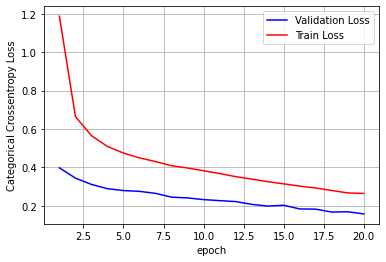

In [117]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Layer

In [118]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(365, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(212, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(55, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 365)               187245    
_________________________________________________________________
batch_normalization_21 (Batc (None, 365)               1460      
_________________________________________________________________
dropout_9 (Dropout)          (None, 365)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 212)             

Test score: 0.3143594692051411
Test accuracy: 0.9204000234603882


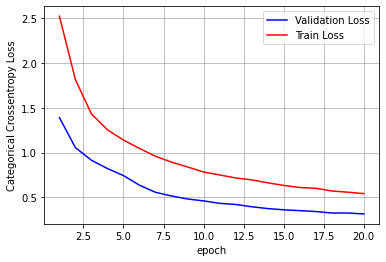

In [119]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [122]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977550 using {'activ': 'relu'}
0.976617 (0.001739) with: {'activ': 'sigmoid'}
0.977550 (0.001855) with: {'activ': 'relu'}


Conclusion

In [132]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Layers", "Test Score", "Test accuracy"]

x.add_row(["Softmax classifier", 2, 0.34, 0.91])
x.add_row(["MLP + Sigmoid activation + SGDOptimizer", 2,0.45, 0.87])
x.add_row(["MLP + Sigmoid activation + SGDOptimizer", 2,0.46, 0.87])
x.add_row(["MLP + Sigmoid activation + SGDOptimizer", 3,1.02, 0.69])
x.add_row(["MLP + Sigmoid activation + SGDOptimizer", 5,2.3, 0.11])
x.add_row(["MLP + Sigmoid activation + ADAM", 2,0.07, 0.98])
x.add_row(["MLP + Sigmoid activation + ADAM", 2,0.07, 0.98])
x.add_row(["MLP + Sigmoid activation + ADAM", 3,0.09, 0.97])
x.add_row(["MLP + Sigmoid activation + ADAM", 5,0.10, 0.97])
x.add_row(["MLP + ReLU +SGD", 2,0.12, 0.96])
x.add_row(["MLP + ReLU +SGD", 2,0.11, 0.96])
x.add_row(["MLP + ReLU +SGD", 3,0.11, 0.96])
x.add_row(["MLP + ReLU +SGD", 5,0.10, 0.97])
x.add_row(["MLP + ReLU + ADAM ", 2,0.09, 0.98])
x.add_row(["MLP + ReLU + ADAM ", 2,0.10, 0.98])
x.add_row(["MLP + ReLU + ADAM ", 3,0.11, 0.97])
x.add_row(["MLP + ReLU + ADAM ", 5,0.11, 0.97])
x.add_row(["MLP + Batch-Norm on hidden Layers + AdamOptimizer", 2,0.10, 0.97])
x.add_row(["MLP + Batch-Norm on hidden Layers + AdamOptimizer", 2,0.09, 0.97])
x.add_row(["MLP + Batch-Norm on hidden Layers + AdamOptimizer", 3,0.10, 0.97])
x.add_row(["MLP + Batch-Norm on hidden Layers + AdamOptimizer", 5,0.14, 0.95])
x.add_row(["MLP + Dropout + AdamOptimizer", 2,0.10, 0.96])
x.add_row(["MLP + Dropout + AdamOptimizer", 2,0.09, 0.97])
x.add_row(["MLP + Dropout + AdamOptimizer", 3,0.15, 0.95])
x.add_row(["MLP + Dropout + AdamOptimizer", 5,0.31, 0.92])
print (x)

+---------------------------------------------------+--------+------------+---------------+
|                       Model                       | Layers | Test Score | Test accuracy |
+---------------------------------------------------+--------+------------+---------------+
|                 Softmax classifier                |   2    |    0.34    |      0.91     |
|      MLP + Sigmoid activation + SGDOptimizer      |   2    |    0.45    |      0.87     |
|      MLP + Sigmoid activation + SGDOptimizer      |   2    |    0.46    |      0.87     |
|      MLP + Sigmoid activation + SGDOptimizer      |   3    |    1.02    |      0.69     |
|      MLP + Sigmoid activation + SGDOptimizer      |   5    |    2.3     |      0.11     |
|          MLP + Sigmoid activation + ADAM          |   2    |    0.07    |      0.98     |
|          MLP + Sigmoid activation + ADAM          |   2    |    0.07    |      0.98     |
|          MLP + Sigmoid activation + ADAM          |   3    |    0.09    |     